Name-Tanuja Banerjee

In [11]:
#import the necessary librariries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#load the dataset
data = pd.read_csv("Amazon Sales Data.csv")

In [13]:
#first five rows of the dataset usng head function
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,28-05-2010,669165933,27-06-2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,22-08-2012,963881480,15-09-2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,02-05-2014,341417157,08-05-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,20-06-2014,514321792,05-07-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,01-02-2013,115456712,06-02-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [14]:
#check the missing values
missing_values=data.isnull().sum()
print(missing_values)

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


There is no missing values or null values in the data.our data is already cleand.

In [17]:
#convert order date to DateTime
data["Order Date"]=pd.to_datetime(data["Order Date"])

In [18]:
#extract year and month from order date
data["year"]=data["Order Date"].dt.year
data["month"]=data["Order Date"].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,27-06-2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,15-09-2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,08-05-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,05-07-2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,06-02-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


Data Analysis

In [19]:
#calculate the number of regions
region=data["Region"].nunique()
print("number of Regions:",region)

number of Regions: 7


There are seven different regions in our dataset

In [20]:
#calculate the number of country
Country=data["Country"].nunique()
print("Number of Countries:",Country)

Number of Countries: 76


There are 76 countries in our dataset

In [21]:
#calculate the number of types
Item_Type=data["Item Type"].nunique()
print("Number of Item types:",Item_Type)

Number of Item types: 12


There are 12 different item types in our dataset 

In [22]:
#calculate the total unit sold
Units_Sold=data["Units Sold"].sum()
print("Total unit sold:",Units_Sold)

Total unit sold: 512871


In [23]:
#calculate the total unit cost
Unit_Cost=data["Unit Cost"].sum()
print("Total unit cost:",Unit_Cost)

Total unit cost: 19104.8


In [24]:
#calculate the total revenue
Total_revenue=data["Total Revenue"].sum()
print("Total Revenue:",Total_revenue)

Total Revenue: 137348768.31


In [25]:
#calculate the total cost
Total_cost=data["Total Cost"].sum()
print("Total cost:",Total_cost)

Total cost: 93180569.91000001


In [26]:
#calculate the total profit
Total_profit=data["Total Profit"].sum()
print("Total profit:",Total_profit)

Total profit: 44168198.39999999


In [27]:
data.groupby(["Region","Sales Channel"])["Total Profit"].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

Hence "Asia","Central America and the Caribean","Europe" and "Sub-Saharan Africa" are having more profit in offline and others are having more profit in online and North "America" only have offline option.

Data Visualizations

Text(0, 0.5, 'Total Revenue')

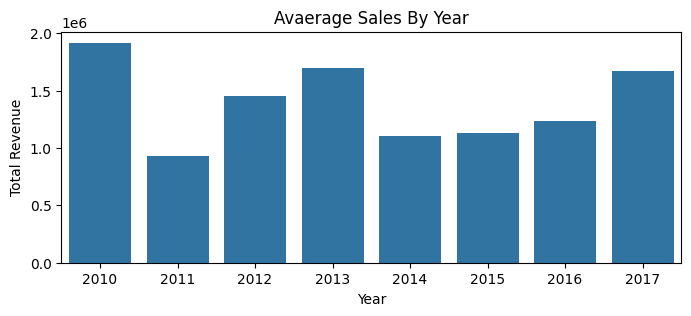

In [28]:
#year wise sales
year_sales=data.groupby("year")["Total Revenue"].mean()
plt.figure(figsize=(8,3))
sns.barplot(x=year_sales.index,y=year_sales.values)
plt.title("Avaerage Sales By Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")

Text(0.5, 1.0, 'Average Profit Region Wise')

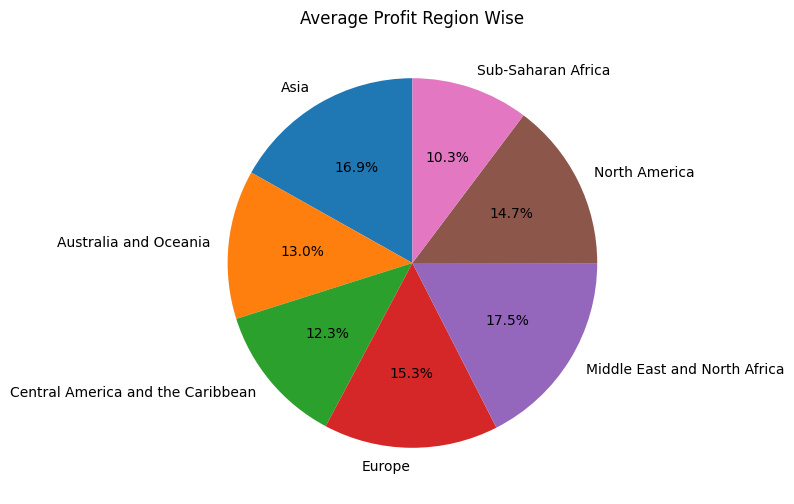

In [29]:
#pie chart of total profit in region wise
plt.figure(figsize=(6,6))
region_TotalRevenue=data.groupby("Region")["Total Profit"].mean()
plt.pie(region_TotalRevenue,startangle=90,labels=region_TotalRevenue.index,autopct="%1.1f%%")
plt.title("Average Profit Region Wise")


In [30]:
#group total revenue by Item type
TotalRevenue_ItemType=data.groupby("Item Type")["Total Revenue"].sum()

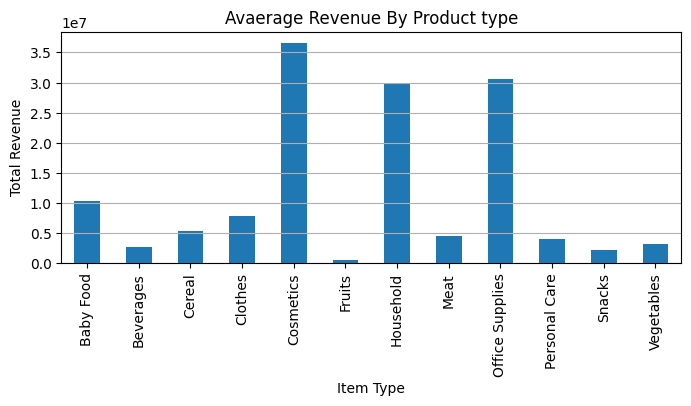

In [ ]:
#bar chart for total revenue by Item Type
plt.figure(figsize=(8,3))
TotalRevenue_ItemType.plot(kind="bar")
plt.title("Avaerage Revenue By Product type")
plt.xlabel("Item Type")
plt.ylabel("Total Revenue")
plt.grid(axis="y")

In [31]:
#group total revenue by sales channel
TotalRevenue_SalesChannel=data.groupby("Sales Channel")["Total Revenue"].mean()

Text(0.5, 1.0, 'Total Revenue By Sales Channel')

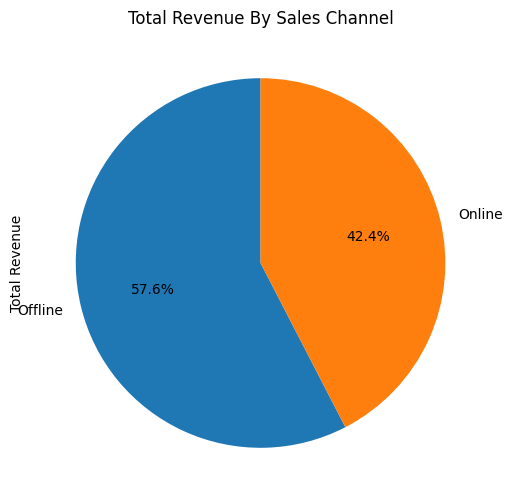

In [32]:
#bar chart for total revenue by Sales channel
plt.figure(figsize=(6,6))
plt.tight_layout()
TotalRevenue_SalesChannel.plot(kind="pie",autopct="%1.1f%%",startangle=90)
plt.title("Total Revenue By Sales Channel")

(np.float64(-1.0999999498582977),
 np.float64(1.0999990226232157),
 np.float64(-1.0999995739796447),
 np.float64(1.0999999797133164))

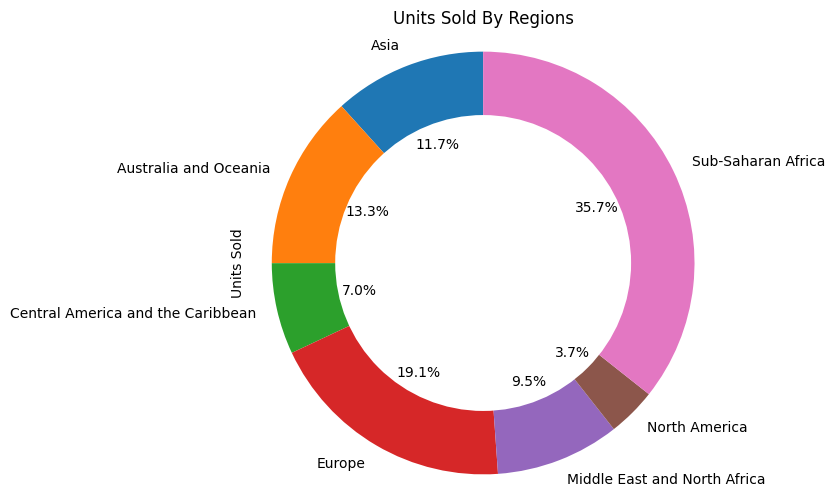

In [33]:
#create a pie chart for a donut chart
Region_Unitsold=data.groupby("Region")["Units Sold"].sum()
plt.figure(figsize=(6,6))
Region_Unitsold.plot(kind="pie",labels=Region_Unitsold.index,autopct="%1.1f%%",startangle=90)


cntr_circle=plt.Circle((0,0),(0.70),fc="white")
fig=plt.gcf()
fig.gca().add_artist(cntr_circle)


plt.title("Units Sold By Regions")
plt.axis("equal")

In [34]:
#group units sold by year and month
YearMonth_UnitsSold=data.groupby(["year","month"])["Units Sold"].sum()

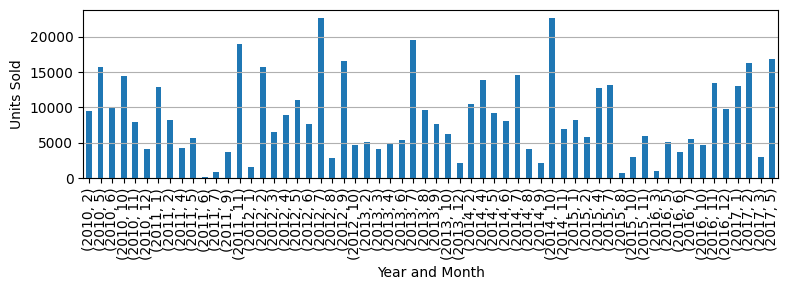

In [ ]:
#create a bar chart for units sold by year and month
plt.figure(figsize=(8,3))
YearMonth_UnitsSold.plot(kind="bar")
plt.xlabel("Year and Month")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.grid(axis="y")

In [35]:
#group total cost by sales channel
TotalCost_SalesChannel=data.groupby(["Sales Channel"])["Total Cost"].sum()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

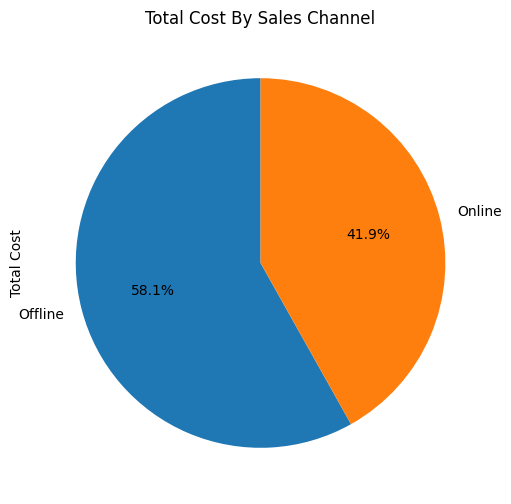

In [36]:
#bar chart for total cost by sales channel
plt.figure(figsize=(6,6))
TotalCost_SalesChannel.plot(kind="pie",autopct="%1.1f%%",startangle=90)
plt.title("Total Cost By Sales Channel")
plt.tight_layout